Bi-Directional BFS Path: ['G', 'F', 'D', 'B', 'A']


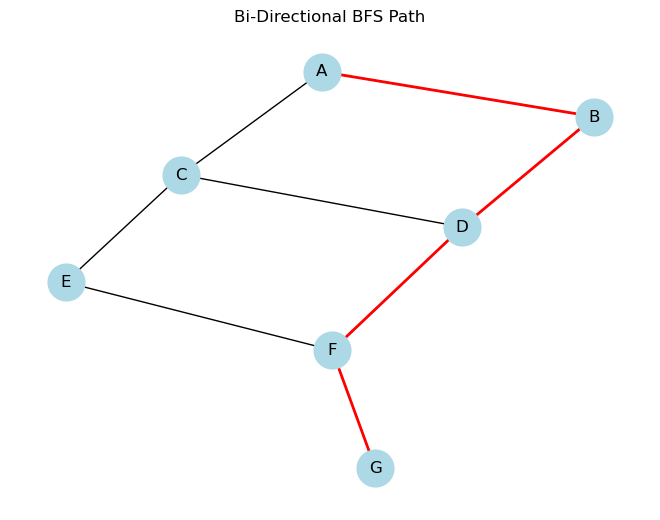

Standard BFS Path: ['A', 'B', 'D', 'F', 'G']


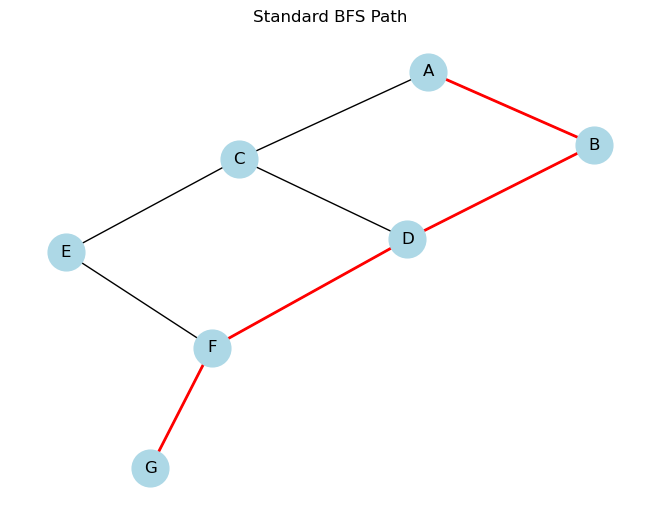

Standard DFS Path: ['A', 'B', 'D', 'C', 'E', 'F', 'G']


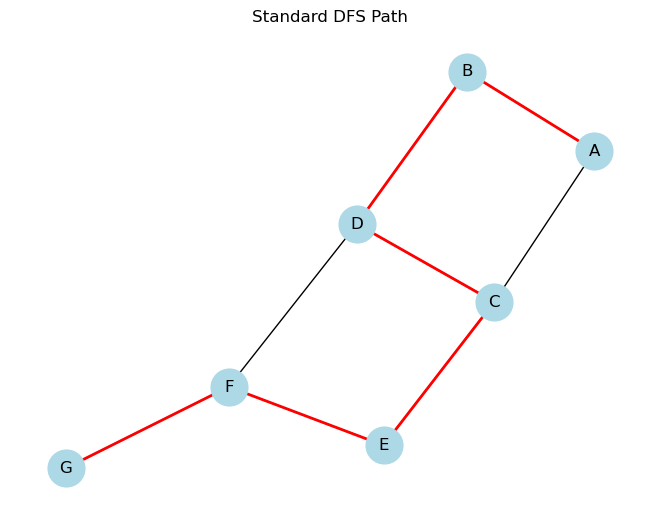

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Bi-directional BFS
def bidirectional_bfs(graph, start, goal):
    if start == goal: 
        return [start]
    
    # Initialize two queues and visited dictionaries
    forward_queue, backward_queue = deque([start]), deque([goal])
    forward_visited, backward_visited = {start: [start]}, {goal: [goal]}

    while forward_queue and backward_queue:
        # Forward step
        if (path := search_step(graph, forward_queue, forward_visited, backward_visited)):
            return path
        # Backward step
        if (path := search_step(graph, backward_queue, backward_visited, forward_visited)):
            return path
    return None

# Helper function for BFS steps
def search_step(graph, queue, visited, other_visited):
    current = queue.popleft()
    for neighbor in graph.neighbors(current):
        if neighbor not in visited:
            visited[neighbor] = visited[current] + [neighbor]
            queue.append(neighbor)
            if neighbor in other_visited:
                return visited[neighbor] + other_visited[neighbor][::-1][1:]
    return None

# Standard BFS
def bfs(graph, start, goal):
    queue, visited = deque([(start, [start])]), set()
    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path
        if node not in visited:
            visited.add(node)
            for neighbor in graph.neighbors(node):
                queue.append((neighbor, path + [neighbor]))
    return None

# Standard DFS
def dfs(graph, start, goal, path=None, visited=None):
    if visited is None: visited = set()
    if path is None: path = [start]
    if start == goal: return path
    visited.add(start)
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            result = dfs(graph, neighbor, goal, path + [neighbor], visited)
            if result: return result
    return None

# Visualize the graph and path
def visualize(graph, path, title="Graph Visualization"):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=12)
    if path:
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color="red", width=2)
    plt.title(title)
    plt.show()

# Main function
if __name__ == "__main__":
    # Create a sample graph (city map)
    G = nx.Graph()
    edges = [
        ("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), 
        ("C", "E"), ("D", "F"), ("E", "F"), ("F", "G")
    ]
    G.add_edges_from(edges)
    
    start, goal = "A", "G"

    # Bi-Directional BFS
    bi_path = bidirectional_bfs(G, start, goal)
    print("Bi-Directional BFS Path:", bi_path)
    visualize(G, bi_path, "Bi-Directional BFS Path")

    # Standard BFS
    bfs_path = bfs(G, start, goal)
    print("Standard BFS Path:", bfs_path)
    visualize(G, bfs_path, "Standard BFS Path")

    # Standard DFS
    dfs_path = dfs(G, start, goal)
    print("Standard DFS Path:", dfs_path)
    visualize(G, dfs_path, "Standard DFS Path")